# Devoir 2 - Transformation appliquée à un rayon de miel

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray' # Choix de la color map par défaut, ne pas modifier
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0) # Taille des figures par défaut, peut-être modifié au cas par cas.

## Description de la transformation 

Par l'utilisation de filtre homomorphique, j'appliquerai une transformation à mon image afin de compter le nombre d'alvéoles.

In [ ]:
# fonctions issues du TP2

def binariser(img, seuil, invert=True):
    threshold_type = cv2.THRESH_BINARY_INV if invert else cv2.THRESH_BINARY
    _, binary_img = cv2.threshold(img,seuil,255,threshold_type)
    return binary_img.astype(np.bool_)

def nb_components(img_bin):
    num_labels, labels_im = cv2.connectedComponents(img_bin)
    return num_labels-1 # On retire le fond qui est componente connectée mais qui ne nous intéresse pas

(183, 350)


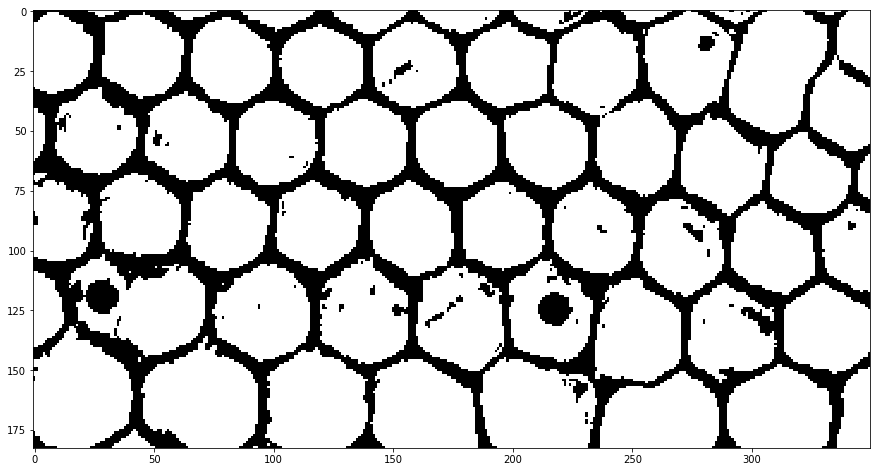

In [45]:
FILENAME_EXO2 = 'TransitionalHoney-transformed.jpg'
img = cv2.imread(FILENAME_EXO2, cv2.IMREAD_GRAYSCALE)
binary_img = binariser(img, 150, invert=False)

print(binary_img.shape)
plt.imshow(binary_img, vmin=0, vmax=1)

Number of honeycombs:  52


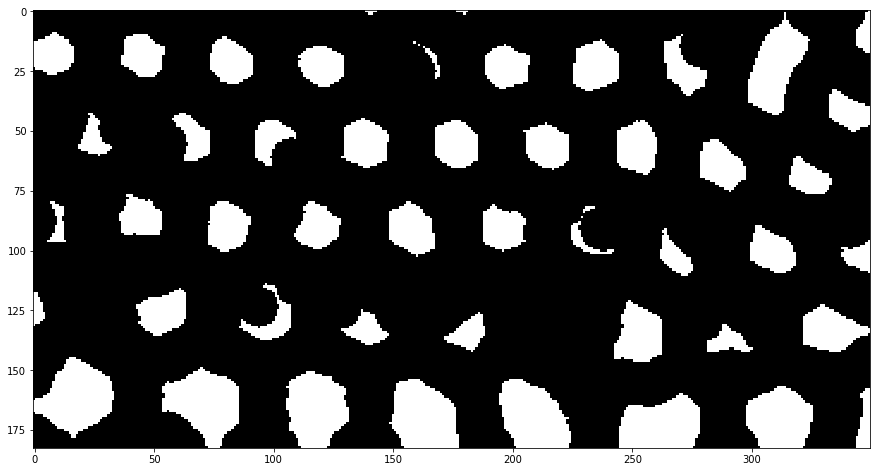

In [43]:
radius = 8
kernel = cv2.circle(
    np.zeros((2*radius+1, 2*radius+1)),
    (radius, radius),
    radius, 1, -1
).astype(np.uint8)
eroded_img = cv2.erode(
    binary_img.astype(np.uint8),
    kernel,
    iterations=1
)

print("Number of honeycombs: ",
      nb_components(eroded_img))
plt.imshow(eroded_img, vmin=0, vmax=1)

In [49]:
cv2.imwrite('TransitionalHoney-final.jpg', eroded_img*255)

True